In [1]:
# data analysis stack
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import pylab as plt


In [2]:
bike=pd.read_csv('../data/train.csv', index_col=0, parse_dates=True)
bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [4]:
bike.shape

(10886, 11)

Create time-related features
Examine whether the bicycle count shows any time-related patterns.

Extract features like hour, month etc. from the datetime column.

Plot small sections of the data (1 day, 1 week etc.)

Group by a time feature and observe grouped means

In [5]:
bike.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='datetime', length=10886)

In [6]:
bike.index.year

Int64Index([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012],
           dtype='int64', name='datetime', length=10886)

In [7]:
bike.index.hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='datetime', length=10886)

Plot small sections of the data (1 day, 1 week etc.)

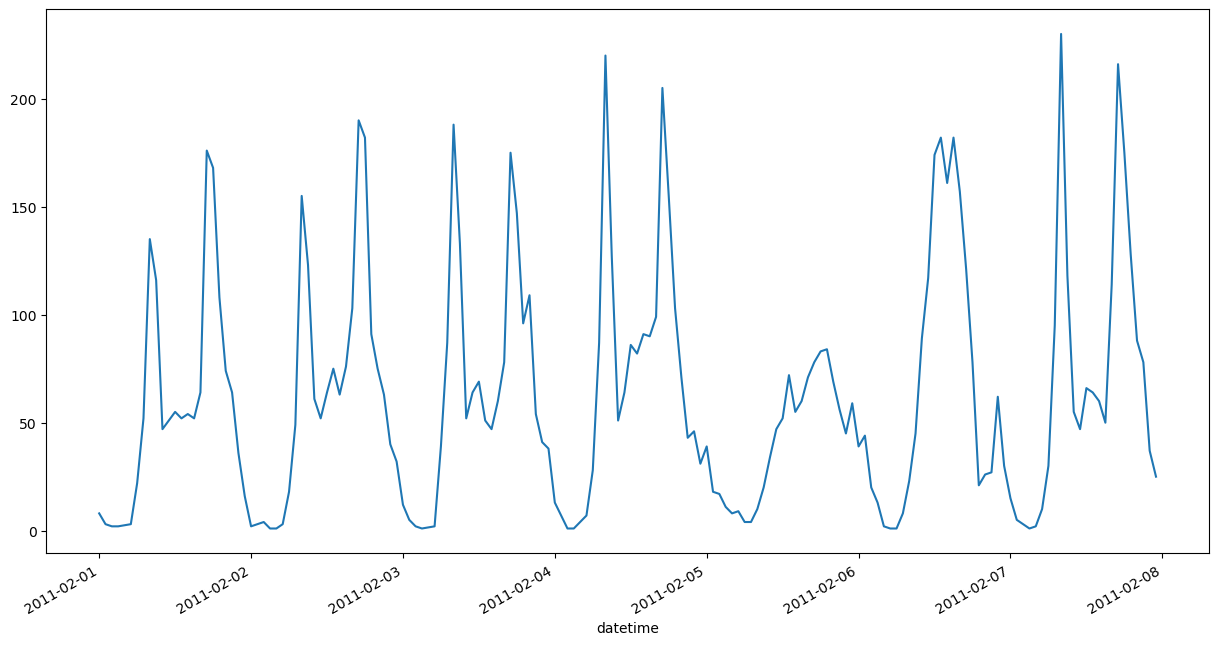

In [8]:
#1week
bike['count']['2011-02-01': '2011-02-07'].plot(figsize=(15, 8));

<Axes: xlabel='datetime'>

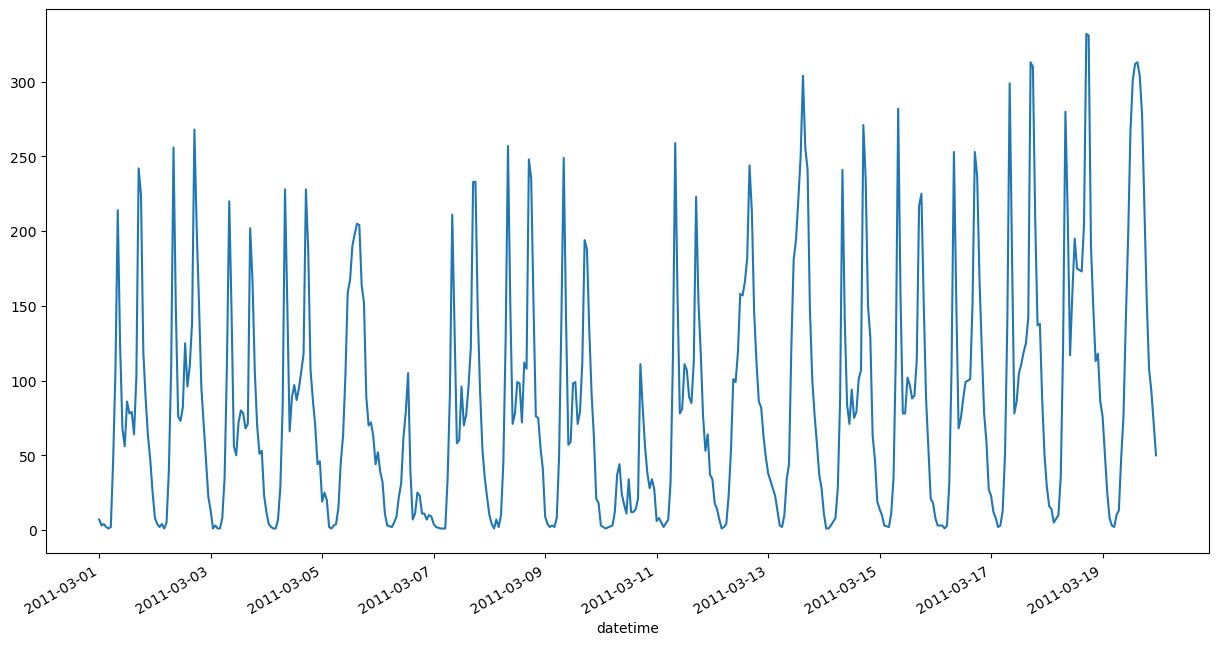

In [9]:
#1month
bike['count']['2011-03'].plot(figsize=(15, 8))

Group by a time feature and observe grouped means

<Axes: xlabel='datetime'>

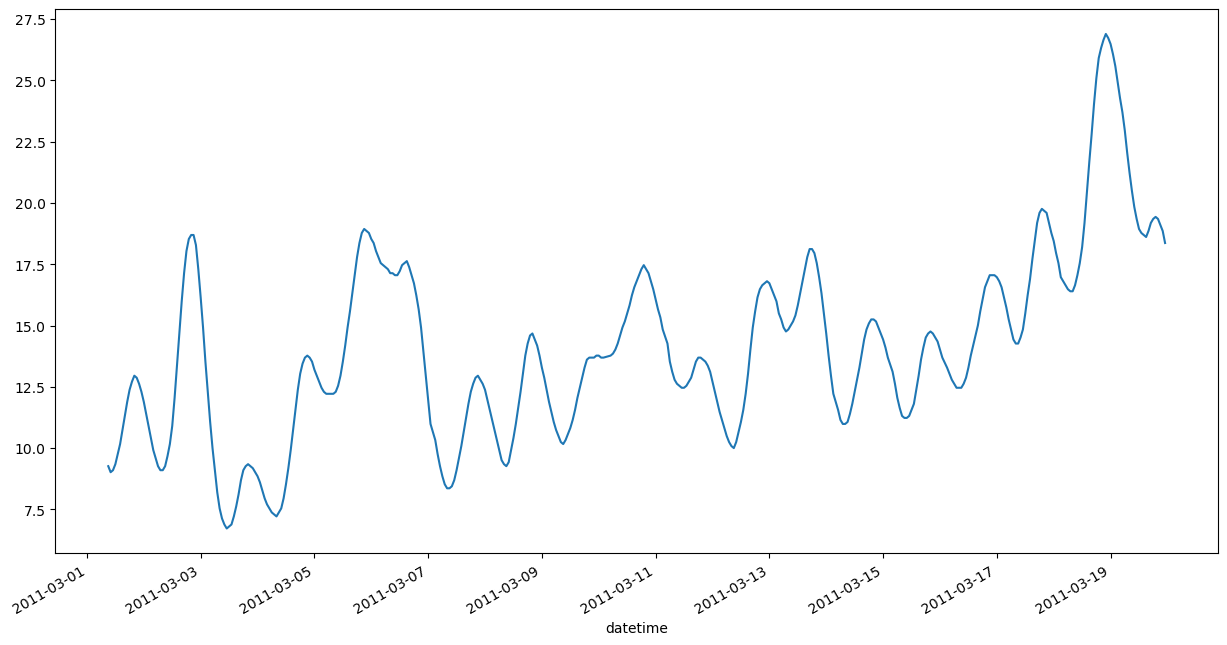

In [10]:
bike['temp']['2011-03'].rolling(10).mean().plot(figsize=(15, 8))

Fit a Linear Regression Model

In [18]:
#Features
numerical_features = [
    'humidity',
    'temp',
    #'windspeed'
]

categorical_features = [
    'season',
    #'holiday',
    'workingday',
    #'weather'
]

features = numerical_features + categorical_features

#target
target = 'count'

In [19]:
# feature and target columns
X,y = bike[features],bike[target]

In [24]:

# replace the X and y with the X and y from your own data.
X, y = make_regression(n_features=4, n_samples=10, noise=0.2)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(Xtrain, ytrain)

print("Coefficients:", lr.coef_)
print("Intercept   :", lr.intercept_)

print("train score :", lr.score(Xtrain, ytrain))
print("test score  :", lr.score(Xtest, ytest))

Coefficients: [80.17063184  3.38558747 52.2036212  44.24812901]
Intercept   : 0.07119592852409795
train score : 0.9999987269053345
test score  : 0.9999509689254199
